# Домашнее задание №2

<span style="color: red; font-size: 14pt">Дедлайн: 13 марта 23:59</span>

Машинное обучение, ФИВТ, Весна 2018

Составлено с использованием материалов Евгения Колмакова и Юрия Кашницкого (открытый курс машинного обучения, тема 3), а также лекций по машинному обучению Евгения Соколова

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall <номер_группы> <фамилия>``, к примеру -- ``ML2018_fall 596 ivanov``
- Выполненное дз сохраните в файл ``ML2018_<фамилия>_<группа>_task<номер задания>.ipnb``, к примеру -- ``ML2018_ivanov_596_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``

--------
- **PS1**: Используются автоматические фильтры, мы не найдем ваше дз, если вы укажете тему письма в неправильном формате.
- **PS2**: Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре

## Часть 0. Вопросы для самоконтроля

##### Перед выполнением задания убедитесь, что вы знаете ответы на этот теор.минимум
##### Эта часть задания не оценивается, ответы можно не записывать

1. Что такое решающее дерево? Как по построенному дереву найти прогноз для объекта?
2. Почему для любой выборки можно построить дерево, имеющее нулевую ошибку на ней? Приведите примеры.
3. Почему не рекомендуется строить небинарные деревья (имеющие более двух потомков у каждой вершины)?
4. Как устроен жадный алгоритм построения дерева?
5. Какие критерии информативности для решения задачи классификации вы знаете?
6. Какой смысл у критерия Джини и энтропийного критерия?
7. Какие критерии информативности для решения задачи регрессии вы знаете?
8. Что такое pruning (стрижка) дерева? Чем отличаются post-pruning и pre-pruning?
9. Какие методы обработки пропущенных значений вы знаете?
10. Как учитывать категориальные признаки в решающем дереве?
11. Что такое mean target encoding? Почему эта техника хорошо работает для решающих деревьев?
12. Как работает отбор признаков с помощью решающих деревьев?

## Часть 1. Теоретические задачи

##### 30% баллов за задание, оценочное время выполнения 1 час

##### Решение можно затехать здесь или написать от руки и добавить фото в ноутбук

### Задача 1 (10% баллов)

Какая стратегия поведения в листьях регрессионного дерева приводит к меньшему матожиданию ошибки по MSE: отвечать средним значением таргета на объектах обучающей выборки, попавших в лист, или отвечать таргетом для случайного объекта из листа (считая все объекты равновероятными)?

**Решение: ** Пусть у нас есть дерево Т. Рассмотрим его произвольный лист. В нем находятся элементы $y_1, y_2, ..., y_n$. Обозначим множетсво этих элементов за Y. Пусть в наш лист приходит произвольный элемент $(x,y_i)$, где $y_i \in Y$. Пусть $a_1(x)$ - это действие по первой стратегии, а $a_2(x)$ - это действие по второй стратегии Посчитаем мат. ожидание: $Ea_1(x) = \sum\limits_{i = 1}^{n} \frac{1}{n} y_i = \overline{Y}$; $Ea_2(x) = \sum\limits_{i = 1}^{n} \frac{1}{n} y_i^2 = \overline{Y^2}$.
С помощью этого можем посчитать: $$E(a_1(x) - y_k)^2 = Ea_1(x)^2 - 2Ea_1(x) \cdot y_k + Ey_k^2 = {\overline{Y}}^2 - 2\overline{Y}\cdot y_k + y_k^2 $$ $$ E(a_2(x) - y_k)^2 = Ea_2(x)^2 - 2Ea_2(x) \cdot y_k + Ey_k^2 = \overline{Y^2} - 2\overline{Y}\cdot y_k + y_k^2.$$
Найдем разность этих величит и узнаем, какая из стратегий лучше:
$$E(a_1(x) - y_k)^2 - E(a_2(x) - y_k)^2 =  {\overline{Y}}^2 - 2\overline{Y}\cdot y_k + y_k^2 - (\overline{Y^2} - 2\overline{Y}\cdot y_k + y_k^2) = {\overline{Y}}^2 - \overline{Y^2} \le 0.$$
Матожидание ошибки у первой стратегии меньше, поэтому она лучше.

### Задача 2 (15% баллов)

Критерий информативности для набора объектов $L$ вычисляется на основе того, насколько хорошо их целевые переменные предсказываются константой (при оптимальном выборе этой константы):
$$H(R) = \min_{c \in Y} \dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} L(y_i, c),$$
где $L(y_i, c)$- некоторая функция потерь. Соответственно, чтобы получить вид критерия при конкретной функции потерь, необходимо аналитически найти оптимальное значение константы и подставить его в формулу для $H(R)$.

Выведите критерии информативности для следующих функций потерь:
1. $L(y,c) = (y-c)^2$
2. $L(y,c) = \sum_{k=1}^K (c_k-[y=k])^2$
3. $L(y,c) = -\sum_{k=1}^K [y=k]\log c_k$

**Подсказка**:
должны получиться дисперия, критерий Джини и энтропийный критерий.

1) Так как $L(y,c) = (y-c)^2$, то $H(R) = \min_{c \in Y} \dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} L(y_i, c) = \min_{c \in Y} \dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} (y_i-c)^2 = \min_{c \in Y} g(с)$. Надо найти минимум g(c), то есть решить уравние: $g'(c) = 0$. $$g'(c) = -\dfrac{1}{|R|} \sum_{(x_i,y_i) \in R}  2 (y_i - c) = -2(\dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} y_i - \dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} c) = -2(\overline{y} - c)$$
То есть, $$\overline{y} - c = 0$$ Отсюда получаем: $\overline{y} = c$.
Определим выпуклая или впуклая функция:
$$g''(c) = \dfrac{1}{|R|} \sum_{(x_i,y_i) \in R}2 = 2 > 0$$ Следовательно, выпуклая вниз. Следовательно, $\overline{y}$ - ее минимум.

Итого, получаем дисперсию: $$H(R) = \min_{c \in Y} \dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} (y_i-\overline{y})^2$$

2) Аналогично первому пункту: $$H(R) = \min_{c \in Y} \dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} L(y_i, c) = \min_{c \in Y} \dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} \sum_{k=1}^K (c_k-[y=k])^2 = \min_{c \in Y} \dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} \sum_{k=1}^K (c_k^2 - 2c_k[y=k] + [y=k]^2) = min_{c \in Y} \dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} \sum_{k=1}^K (c_k^2 - 2c_k[y=k] + [y=k]) $$ Так же обохначим функцию под минимумом за g, а за $q_k$ обозначим долю объетов класса $k$. Получим: $$g = \sum_{k=1}^K (\dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} c_k^2 - 2 c_k \dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} [y=k] + \dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} [y=k] = \sum_{k=1}^K (c_k^2 - 2 c_k q_k + q_k)$$ Понятно, что минимум достигается при $c_k = q_k$ В итоге получаем: $$H(R) = \sum_{k=1}^K (q_k^2 - 2 q_k^2 + q_k) = \sum_{k=1}^K q_k (1 - q_k)$$ Получили критерий Джини.

### Задача 3 (5% баллов)

Запишите оценку сложности построения одного решающего дерева в зависимости от размера обучающей выборки $l$, числа признаков $d$, максимальной глубины дерева $D$. В качестве предикатов используются пороговые функции $[x_j>t]$. При выборе предиката в каждой вершине перебираются все признаки, а в качестве порогов рассматриваются величины $t$, равные значения этого признака на объектах, попавших в текущую вершину. Считайте сложность вычисления критерия информативноси константной.

**Решение:** При построении дерева в каждом его узле при разбиении будет: сначала цикле по d будет производиться сортировка за $l * log(l)$, потом рассмотриваются разбиения выборки по признаку. Так как критерий информативности считается за константу, то получаем, что весь цикл - это $O(d * l * log(l))$. Далее, рассмотрим детей: в детях будет происходить $O(d * l_1 * log(l_1)) + O(d * l_2 * log(l_2)) = O(d * (l_1 * log(l_1) + l_2 * log(l_2))) <= O(d * l * log(l))$ операций. То есть на каждом уровне будет $O(d * l * log(l))$ операций. Так как глубина D, то получаем итоговый ответ: $O(D * d * l * log(l))$.

## Часть 2. Визуализация решающих деревьев

##### 20% баллов за задание, оценочное время выполнения 30 минут

Для начала нужно поставить GraphViz

- На macOS:
    - sudo pip install pydotplus
    - brew install graphviz
- Linux должно работать то же самое с заменой brew на sudo apt-get
    - sudo pip install pydotplus
    - sudo apt-get install graphviz
- Windows
    - Установить GraphViz отсюда: http://www.graphviz.org/Download_windows.php
    - Добавить путь к папке bin в PATH (например, "C:\Programs\Graphviz2.38\bin")
    - pip install pydotplus

Постройте решающее дерево из sklearn на датасете Car Evaluation Dataset (https://archive.ics.uci.edu/ml/datasets/car+evaluation)

In [4]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', header=None)
columns = ('buying maint doors persons lug_boot safety values')
df.columns = columns.split()
df.head()

,buying,maint,doors,persons,lug_boot,safety,values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
#перекодируем данные
def number_encode_features(init_df):
    result = init_df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result

encoded_data = number_encode_features(df)
encoded_data.head()

,buying,maint,doors,persons,lug_boot,safety,values
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [7]:
encoded_data = shuffle(encoded_data.values)

In [8]:
train , test = train_test_split(encoded_data, test_size=0.3)

X_test, y_test = test[:,:-1], test[:,-1]
X_train, y_train = train[:,:-1], train[:,-1]

In [9]:
clf = DecisionTreeClassifier(max_depth=10, criterion="gini", min_samples_leaf=1, max_features=None)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Визуализируйте получившееся дерево с помощью GraphViz (следующая функция может помочь):

In [10]:
import IPython.display #needed to render in notebook
from io import StringIO
import pydotplus  #needed to convert dot format to png
from sklearn import tree

def draw_decision_tree(clf, column_names):
    dot_data = StringIO() 
    tree.export_graphviz(clf, out_file=dot_data, feature_names=column_names) 
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    a = IPython.display.Image(graph.create_png())
    IPython.display.display(a)

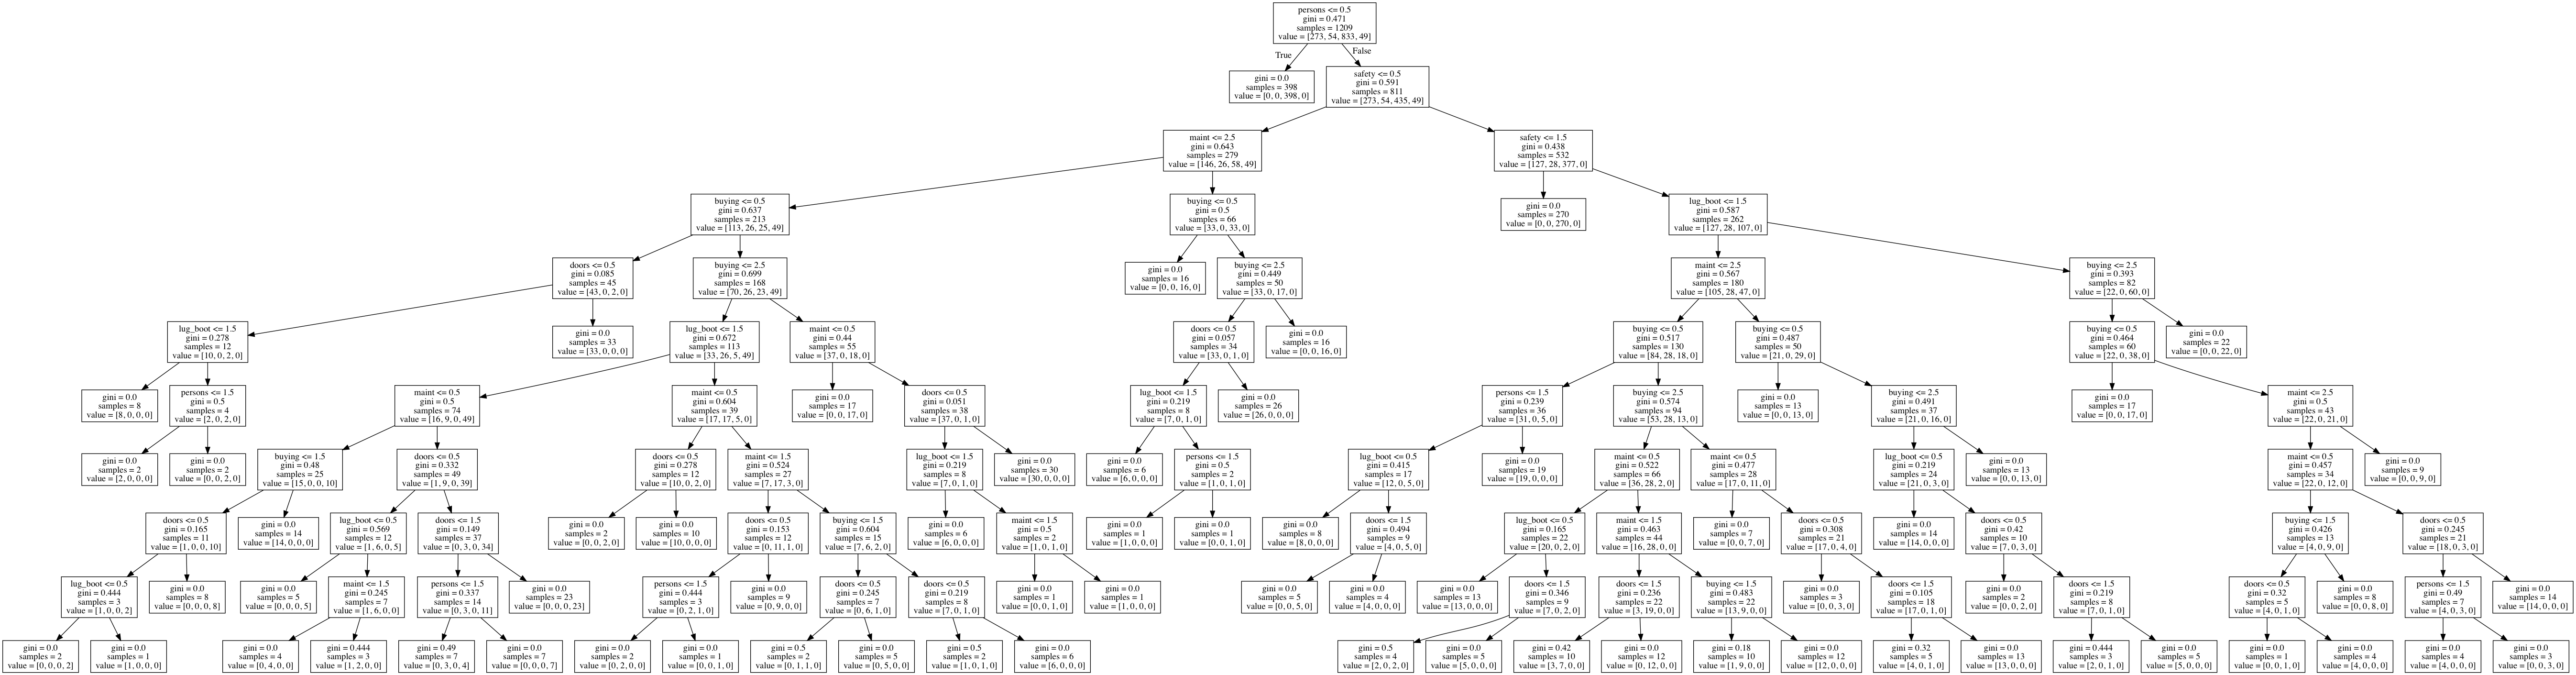

In [11]:
draw_decision_tree(clf, df.columns[:-1])

In [12]:
predictions = clf.predict(X_test)
metrics.accuracy_score(y_test, predictions)

0.95568400770712914

Посмотрите, как меняется картинка для различных значений структурных параметров (варьируйте параметры max_depth, criterion, min_samples_leaf, max_features). Убедитесь, что увеличение глубины дерева и уменьшение количества объектов в листьях способствует гибкости модели и, как следствие, переобучению (что соответствует интуитивным соображениям о структуре дерева).

Будем постепенно увеличивать глубину дерева и смотреть на accuracy_score.

In [13]:
depths = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]
scores = np.array([])
for i in depths:
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    scores = np.append(scores, metrics.accuracy_score(y_test, predictions))

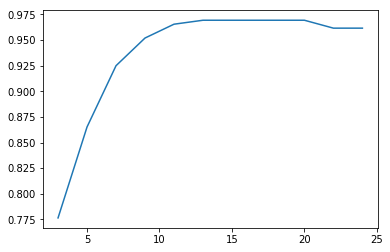

In [14]:
plt.plot(depths, scores)

plt.show()

Будем постепенно уменьшать количество объектов и смотреть на accuracy_score.

In [15]:
samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]
scores = np.array([])
for i in samples_leaf_grid:
    clf = DecisionTreeClassifier(min_samples_leaf=i)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    scores = np.append(scores, metrics.accuracy_score(y_test, predictions))

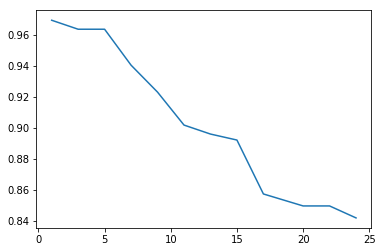

In [16]:
plt.plot(samples_leaf_grid, scores)

plt.show()

**Вывод:** Эффект переобычения наблюдается, но слабо. Это связанно с тем, что у нас очень мало признаков, да еще и каждый признак имеет всего несколько различных значений. Если бы признаков было в несколько раз больше и каждый признак имелл много различных значений, то при увеличении глубины или при уменьшении количества объектов в листе мы бы наблюдали переобучение (следует из логических соображений).

## Часть 3. Реализация алгоритма построения дерева решений

##### 50% баллов за задание, оценочное время выполнения 2-3 часа

In [19]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.base import BaseEstimator
from sklearn.datasets import make_classification, make_regression, load_digits, load_boston
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error

Зафиксируем заранее `random_state` (a.k.a. random seed). Это должно повысить вероятность полной воспроизводимости результатов, впрочем, замечено, что тем не менее небольшие флуктуации возможны (например, качества прогнозов дерева, которое мы сейчас вырастим) в случае разных ОС.

In [20]:
RANDOM_STATE = 42

**Необходимо реализовать класс `DecisionTree`**

**Спецификация:**
- класс наследуется от `sklearn.BaseEstimator`;
- конструктор содержит следующие параметры: 
    `max_depth` - максимальная глубина дерева (по умолчанию - `numpy.inf`); 
    `min_samples_split` - минимальное число объектов в вершине, при котором происходит её разбиение (по умолчанию - 2); 
    `criterion` - критерий разбиения (для классификации - 'gini' или 'entropy', для регрессии - 'variance' или 'mad_median'; 
    по умолчанию - 'gini');
    
    Функционал, значение которого максимизируется для поиска оптимального разбиения в данной вершине имеет вид
    $$Q(X, j, t) = F(X) - \dfrac{|X_l|}{|X|} F(X_l) - \dfrac{|X_r|}{|X|} F(X_r),$$
    где $X$ - выборка, находящаяся в текущей вершине, $X_l$ и $X_r$ - разбиение выборки $X$ на две части 
    по предикату $[x_j < t]$, а $F(X)$ -критерий разбиения.
    
    1. Для классификации: пусть $p_i$ - доля объектов $i$-го класса в выборке $X$.
    
        - 'gini': Неопределенность Джини $F(X) = 1 -\sum_{i = 1}^K p_i^2$.
    
        - 'entropy': Энтропия $F(X) = -\sum_{i = 1}^K p_i \log_2(p_i)$.
    
    2. Для регрессии: $y_j = y(x_j)$ - ответ на объекте $x_j$, $y = (y_1, \dots, y_{|X|})$ - вектор ответов.
    
        - 'variance': Дисперсия (среднее квадратичное отклонение от среднего) $F(X) = \dfrac{1}{|X|} \sum_{x_j \in X}(y_j - \dfrac{1}{|X|}\sum_{x_i \in X}y_i)^2$
    
        - 'mad_median': Среднее отклонение от медианы $F(X) = \dfrac{1}{|X|} \sum_{x_j \in X}|y_j - \mathrm{med}(y)|$
    
- класс имеет методы `fit`, `predict` и `predict_proba`;
- метод `fit` принимает матрицу объектов `X` и вектор ответов `y` (объекты `numpy.ndarray`) и возвращает экземпляр класса
    `DecisionTree`, представляющий собой решающее дерево, обученное по выборке `(X, y)` с учётом заданных в конструкторе параметров; 
- метод `predict_proba` принимает матрицу объектов `X` и возвращает матрицу `P` размера `X.shape[0] x K`, где `K` - число классов, такую что $p_{ij}$ есть вероятность принадлежности объекта, заданного $i$-ой строкой матрицы X к классу $j \in \{1, \dots, K\}$.
- метод `predict` принимает матрицу объектов и возвращает вектор предсказанных ответов; в случае классификации - это 
    наиболее многочисленный класс в листе, в который попал объект, а в случае регрессии - среднее значение ответов по 
    всем объектам этого листа;

**Советы по реализации:**

- Обучение дерева можно реализовать простым жадным рекурсивным алгоритмом: каждый раз выбирать наилучшее разбиение (номер признака и порог по нему).
- Если возможных порогов для разбиения будет слишком много, выбор наилучшего разбиения окажется вычислительно очень громоздкой задачей. Можно ограничить множество порогов любым удобным способом (например, посчитать квантили значений каждого признака или просто взяв случайный набор порогов).
- Лучше не подсматривать решение в готовых нагугленных вариантах. От вас требуется сделать всего лишь максимально простую реализацию того, как строится и применяется решающее дерево, а не применимую на практике универсальную библиотеку.

### Реализация (30% баллов)

In [21]:
def entropy(y): 
    p_i = np.bincount(y) / len(y)
    p_i = np.array([x for x in p_i if x != 0])
    return (-1) * np.sum(p_i * np.log2(p_i))

def gini(y):
    p_i = np.bincount(y) / len(y)
    return 1 - np.sum(p_i**2)

def variance(y):
    return np.var(y)

def mad_median(y):
    return np.mean(np.absolute(y - np.median(y)))

In [22]:
def functional_Q(F, x, x_l, x_r):
    return F(x) - F(x_l) * len(x_l) / len(x) -  F(x_r) * len(x_r) / len(x)

class SimpleTree():
    def __init__(self, y=None, left=None, right=None, j=None, t=None):
        self.y = y
        self.left = left
        self.right = right
        self.j = j
        self.t = t

class DecisionTree(BaseEstimator):
    
    def __init__(self, max_depth=np.inf, min_samples_split=2, 
                 criterion='gini', debug=False, request_type='classification'):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.criterion = criterion
        self.debug = debug
        self.request_type = request_type
        self.tree = SimpleTree()
        
    def __fit_recursion(self, X, y, tree, h):
        tree.y = y
        if h >= self.max_depth:
            return None
        if len(X) < self.min_samples_split:
            return None
        
        Q = -10000000000
        j = 0
        t = 0
        for j_tmp in np.arange(len(X[0])):
            if self.request_type == 'classification':
                T = np.array(list(set(X[:,j_tmp])))
                T = T[1:]
            if self.request_type == 'regression':
                T = np.random.choice(X[:,j_tmp], size=int(0.1 * len(X)) + 1, replace=False)
            for t_tmp in T:
                l_indexs = []
                r_indexs = []
                for i in range(len(X)):
                    if (X[i,j_tmp] < t_tmp):
                        l_indexs.append(i)
                    else:
                        r_indexs.append(i)
                if self.request_type == 'regression':
                    if len(l_indexs) == 0 or len(r_indexs) == 0:
                        continue
                if self.criterion == "gini":
                    Q_tmp = functional_Q(gini, y, y[l_indexs], y[r_indexs])
                if self.criterion == "entropy":
                    Q_tmp = functional_Q(entropy, y, y[l_indexs], y[r_indexs])
                if self.criterion == "variance":
                    Q_tmp = functional_Q(variance, y, y[l_indexs], y[r_indexs])
                if self.criterion == "mad_median":
                    Q_tmp = functional_Q(mad_median, y, y[l_indexs], y[r_indexs])
                if (Q_tmp > Q):
                    Q = Q_tmp
                    j = j_tmp
                    t = t_tmp
        if Q == 0:
            return None
        if Q == -10000000000:
            return None
        tree.j = j
        tree.t = t
        tree.left = SimpleTree()
        tree.right = SimpleTree()
        l_indexs = []
        r_indexs = []
        for i in np.arange(len(X)):
            if (X[i,j] < t):
                l_indexs.append(i)
            else:
                r_indexs.append(i)

        self.__fit_recursion(X[l_indexs], y[l_indexs], tree.left, h + 1)
        self.__fit_recursion(X[r_indexs], y[r_indexs], tree.right, h + 1)
    
    def fit(self, X, y):
        self.set_y = np.array(list(set(y)))
        self.__fit_recursion(X, y, self.tree, 0)
        return self
        
    def predict(self, X):
        y = np.zeros(len(X))
        for i in np.arange(len(X)):
            tree = self.tree
            while (tree.left != None and tree.right != None):
                if (X[i, tree.j] < tree.t):
                    tree = tree.left
                else:
                    tree = tree.right
            if self.request_type=="classification":
                count = [list(tree.y).count(k) for k in self.set_y]
                argmax = np.argmax(count)
                y[i] = self.set_y[argmax]
                
            if self.request_type=="regression":
                y[i] = np.mean(tree.y)
        return y
        
    def predict_proba(self, X):
        if self.request_type=="regression":
            return None
        y = np.ndarray((len(X), np.size(self.set_y)))
        for i in np.arange(len(X)):
            tree = self.tree
            while (tree.left != None and tree.right != None):
                if (X[i, tree.j] < tree.t):
                    tree = tree.left
                else:
                    tree = tree.right
            y[i] = np.array([list(tree.y).count(k) for k in self.set_y]) / np.size(tree.y)
        return y

## Тестирование реализованного алгоритма

### Классификация (10% баллов)

С помощью метода `load_digits` загрузите датасет `digits`. Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Попробуйте обучить неглубокие решающие деревья и убедитесь, что критерии gini и entropy дают разные результаты.

In [23]:
digits = load_digits()
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = test_size, random_state = RANDOM_STATE)

clf = DecisionTree(max_depth=5, min_samples_split=3, criterion='gini')
clf.fit(X=X_train, y=y_train)
print("Gini: ", metrics.accuracy_score(y_test, clf.predict(X_test)))

clf = DecisionTree(max_depth=5, min_samples_split=3, criterion='entropy')
clf.fit(X=X_train, y=y_train)
print("Entropy: ", metrics.accuracy_score(y_test, clf.predict(X_test)))

Gini:  0.672222222222
Entropy:  0.813888888889


С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `max_depth` и `criterion`. Для параметра `max_depth` используйте диапазон значений - range(3, 11), а для criterion - {'gini', 'entropy'}. Критерий качества `scoring`='accuracy'.

In [24]:
from sklearn import cross_validation, grid_search

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [25]:
clf = DecisionTree(request_type='classification')
grid = {'max_depth' : list(range(3,11)), 'criterion' : ['gini', 'entropy']}
cv = cross_validation.StratifiedShuffleSplit(digits.target, n_iter = 5, test_size = test_size, random_state = RANDOM_STATE)
grid_cv = grid_search.GridSearchCV(clf, grid, scoring='accuracy', cv=cv)
grid_cv.fit(digits.data, digits.target)
print("Оптимальное значение параметров: ", grid_cv.best_params_)

Оптимальное значение параметров:  {'criterion': 'entropy', 'max_depth': 9}


Постройте графики средних значений критерия качества `accuracy` для критериев `gini` и `entropy` в зависимости от `max_depth`.

In [26]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/apple/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['entropy', 'grid', 'shuffle', 'test', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


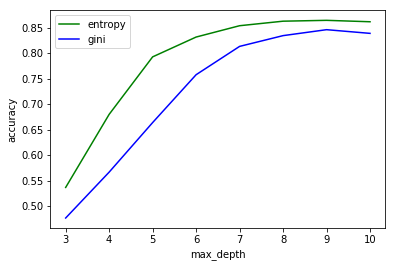

In [27]:
entropy_scores = []
gini_scores = []
for i in grid_cv.grid_scores_:
    if i.parameters['criterion'] == 'entropy':
        entropy_scores.append(i.mean_validation_score)
    if (i.parameters['criterion']=='gini'):
        gini_scores.append(i.mean_validation_score)
plt.plot(list(range(3,11)), entropy_scores, color='green', label="entropy")
plt.plot(list(range(3,11)), gini_scores, color='blue', label="gini")
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров max_depth и criterion?

**Анализ:** Из графика видно, что с увеличением max_depth увеличивается и accuracy примерно до 9, после начинается небольшое снижение. Так же, стоит заметить, что при всех значениях max_depth критерий entropy показывает выше accuracy, чем gini.
Из графика видно, что оптимальные значение criterion - entropy, max_depth - 9, что соответствует тому, что мы получали выше.

Используя найденные оптимальные значения max_depth и criterion, обучите решающее дерево на X_train, y_train и вычислите вероятности принадлежности к классам для X_test.

In [24]:
clf = DecisionTree(max_depth=9, criterion='entropy')
clf.fit(X_train, y_train)
matrix = clf.predict_proba(X_test)
print("Вероятности принадлежности к классам: ")
print(matrix)

Вероятности принадлежности к классам: 
[[ 0.   0.   0.  ...,  0.   0.   0. ]
 [ 0.   0.   0.  ...,  0.   0.   1. ]
 [ 0.   0.   0.  ...,  0.   0.   0. ]
 ..., 
 [ 0.   0.   0.  ...,  0.5  0.   0. ]
 [ 0.   0.   0.  ...,  0.   0.   0. ]
 [ 0.   0.   0.  ...,  0.   0.   0. ]]


Для полученной матрицы вычислите усредненные по всем объектам из `X_test` значения вероятностей принадлежности к классам.

Чему примерно равна максимальная вероятность в полученном векторе?

In [25]:
print("Максимальная вероятность равна: ", np.max(np.mean(matrix, axis=0)))

Максимальная вероятность равна:  0.138888888889


### Регрессия (10% баллов)

С помощью метода `load_boston` загрузите датасет `boston`. Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Попробуйте обучить неглубокие регрессионные деревья и убедитесь, что критерии `variance` и `mad_median` дают разные результаты.

In [26]:
boston = load_boston()
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = test_size, random_state = RANDOM_STATE)

clf = DecisionTree(max_depth=3, min_samples_split=2, criterion='variance', request_type ='regression')
clf.fit(X_train, y_train)
print("Variance: ", metrics.mean_squared_error(y_test, clf.predict(X_test)))

clf = DecisionTree(max_depth=3, min_samples_split=2, criterion='mad_median', request_type ='regression')
clf.fit(X_train, y_train)
print("Mad median: ", metrics.mean_squared_error(y_test, clf.predict(X_test)))

Variance:  18.6825718092
Mad median:  20.3900430329


С помощью 5-кратной кросс-валидации подберите оптимальное значение параметров `max_depth` и `criterion`. Для параметра `max_depth` используйте диапазон значений - `range(2, 9)`, а для `criterion` - {'variance', 'mad_median'}. Критерий качества `scoring`='neg_mean_squared_error'.

In [28]:
tree = DecisionTree(request_type='regression')
grid = { 'max_depth' : list(range(2,9)), 'criterion' : ['variance', 'mad_median'] }
cv = cross_validation.KFold(np.size(boston.target), n_folds = 5, shuffle=True, random_state = RANDOM_STATE)
grid_cv = grid_search.GridSearchCV(tree, grid, scoring='neg_mean_squared_error', cv=cv)
grid_cv.fit(boston.data, boston.target)
print("Оптимальное значение параметров: ", grid_cv.best_params_)

Оптимальное значение параметров:  {'criterion': 'variance', 'max_depth': 5}


Постройте графики средних значений критерия качества `neg_mean_squared_error` для критериев `variance` и `mad_median` в зависимости от `max_depth`.

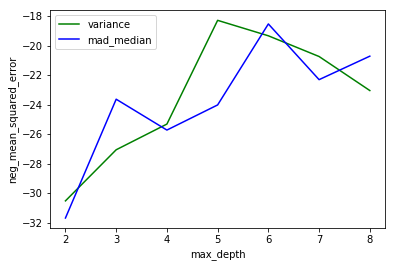

In [29]:
variance_scores = []
mad_median_scores = []
for i in grid_cv.grid_scores_:
    if i.parameters['criterion'] == 'variance':
        variance_scores.append(i.mean_validation_score)
    if (i.parameters['criterion']=='mad_median'):
        mad_median_scores.append(i.mean_validation_score)
plt.plot(list(range(2,9)), variance_scores, color='green', label="variance")
plt.plot(list(range(2,9)), mad_median_scores, color='blue', label="mad_median")
plt.xlabel('max_depth')
plt.ylabel('neg_mean_squared_error')
plt.legend()

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров max_depth и criterion

**Анализ:** 
Из графика видно, что при увеличении max_depth прямые колеблются. Так же, видно, что на некоторых значениях max_depth критерий variance показывает neg_mean_squared_error меньше, чем mad_median, а на некоторых наоборот. Из графика видно, что оптимальные значение criterion - variance, max_depth - 5, что соответствует тому, что мы получали выше.